In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)

In [3]:
binomial = np.random.binomial(10, 0.5, 100)
np.histogram(binomial, bins=20)

(array([ 1,  0,  4,  0,  0, 18,  0,  0, 17,  0,  0, 27,  0,  0, 19,  0,  0,
         9,  0,  5], dtype=int64),
 array([1.  , 1.35, 1.7 , 2.05, 2.4 , 2.75, 3.1 , 3.45, 3.8 , 4.15, 4.5 ,
        4.85, 5.2 , 5.55, 5.9 , 6.25, 6.6 , 6.95, 7.3 , 7.65, 8.  ]))

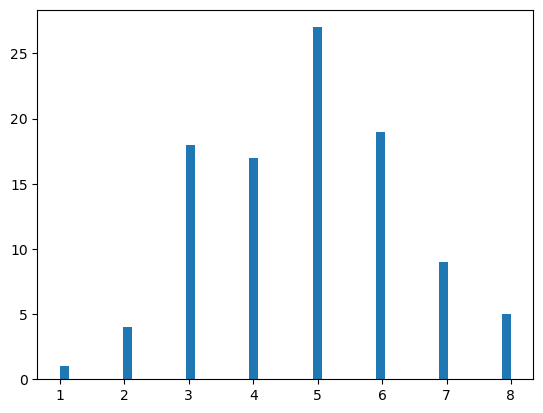

In [4]:
plt.hist(binomial, bins=50)
plt.show()

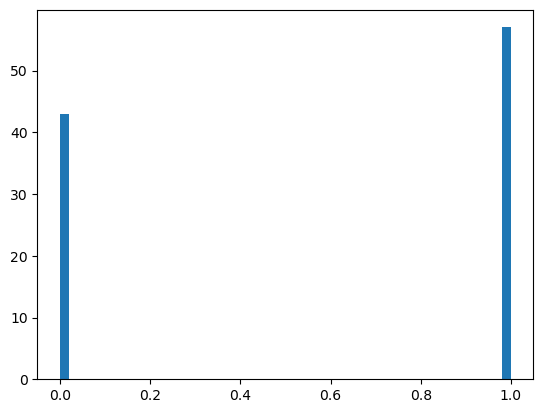

In [5]:
bernoulli = np.random.binomial(1, 0.5, 100)
plt.hist(bernoulli, bins=50)
plt.show()

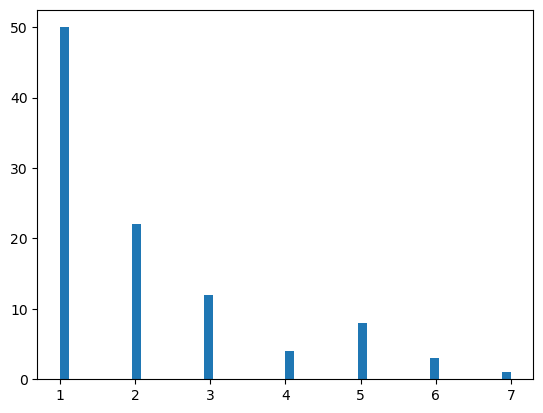

In [6]:
geome = np.random.geometric(0.5, 100)
plt.hist(geome, bins=50)
plt.show()

In [7]:
multi = np.random.multinomial(n=20, pvals=[1/6.]*6, size=1)
multi

array([[6, 4, 2, 1, 3, 4]])

In [8]:
multi = np.random.multinomial(n=20, pvals=[1/6.]*6, size=10)
multi

array([[2, 2, 1, 6, 1, 8],
       [5, 1, 1, 2, 6, 5],
       [2, 3, 4, 5, 4, 2],
       [2, 2, 1, 4, 4, 7],
       [3, 4, 4, 2, 3, 4],
       [2, 5, 1, 5, 5, 2],
       [5, 2, 3, 4, 2, 4],
       [3, 2, 3, 1, 7, 4],
       [1, 4, 3, 4, 6, 2],
       [4, 1, 3, 4, 4, 4]])

In [9]:
np.random.seed(0)

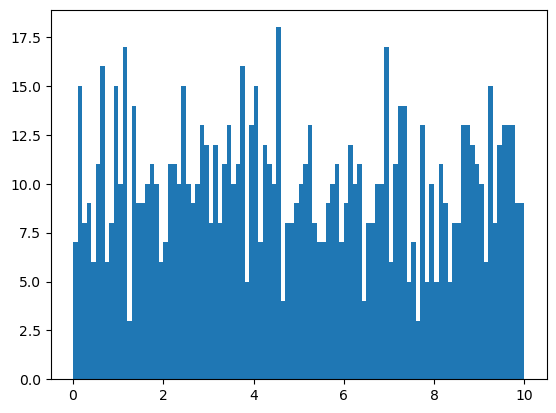

In [10]:
unif = np.random.uniform(0, 10, 1000)
plt.hist(unif, bins=100)
plt.show()

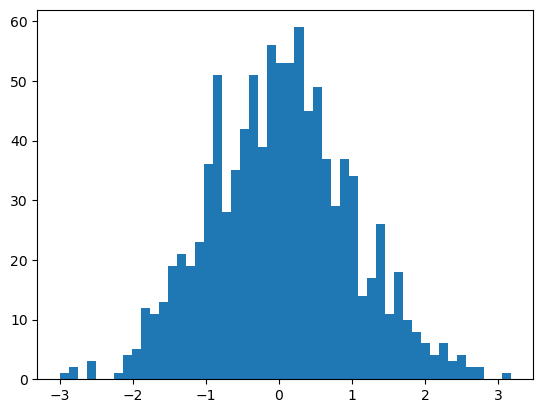

In [11]:
norm = np.random.normal(0, 1, 1000)
plt.hist(norm, bins=50)
plt.show()

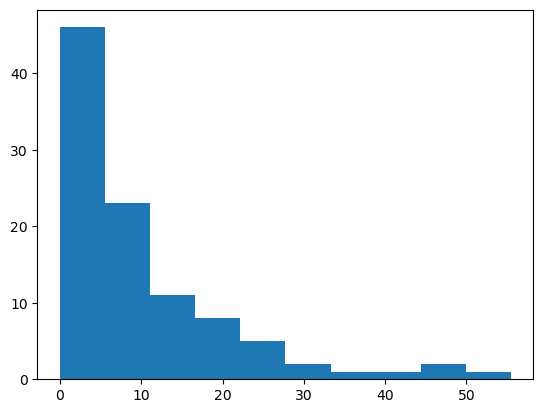

In [12]:
expo = np.random.exponential(10, 100)
plt.hist(expo, bins=10)
plt.show()

In [13]:
from scipy.stats import fisher_exact

In [14]:
oddsratio, pvalue = fisher_exact([[8,2],[1,5]])
print(oddsratio, pvalue)

20.0 0.034965034965034975


In [15]:
table = np.array([[59, 6], [16,80]])
print(table)

[[59  6]
 [16 80]]


In [16]:
from statsmodels.stats.contingency_tables import mcnemar

In [17]:
result = mcnemar(table, exact=False, correction=True)
print('statistic=%.6f, p-value=%.6f' % (result.statistic, result.pvalue))

statistic=3.681818, p-value=0.055009


In [18]:
result = mcnemar(table, exact=False, correction=False)
print('statistic=%.6f, p-value=%.6f' % (result.statistic, result.pvalue))

statistic=4.545455, p-value=0.033006


In [19]:
import scipy.stats
def mcnemar_midp(table):
    b, c = table[0,1], table[1,0]
    n = b+c
    dist = scipy.stats.binom(n, .5)
    x = min(b, c)
    return mcnemar(table).pvalue - dist.pmf(x)

In [20]:
mcnemar_midp(table)

0.03468966484069824

In [21]:
from scipy.stats import chisquare
data = [19, 41, 40]
exp = [20, 30, 50]
chisquare(data,f_exp=exp)

Power_divergenceResult(statistic=6.083333333333333, pvalue=0.047755231078826975)

In [22]:
import seaborn as sns

In [23]:
iris = sns.load_dataset('iris')
iris.corr(method='pearson')

C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\900303016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method='pearson')


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


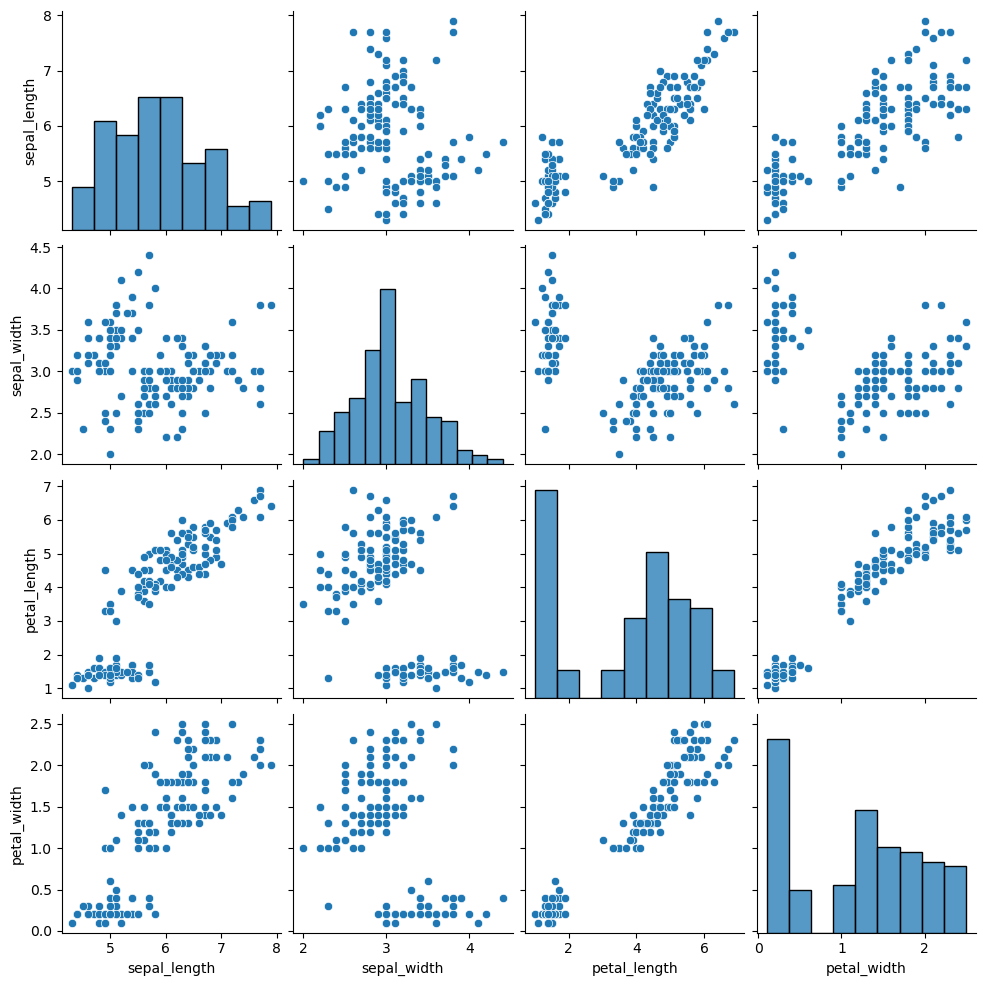

In [24]:
sns.pairplot(iris)

In [25]:
from scipy.stats.stats import pearsonr
pearsonr(iris.petal_length, iris.petal_width)

C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\3443563016.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.962865431402796, pvalue=4.675003907328653e-86)

<Axes: xlabel='petal_length', ylabel='petal_width'>

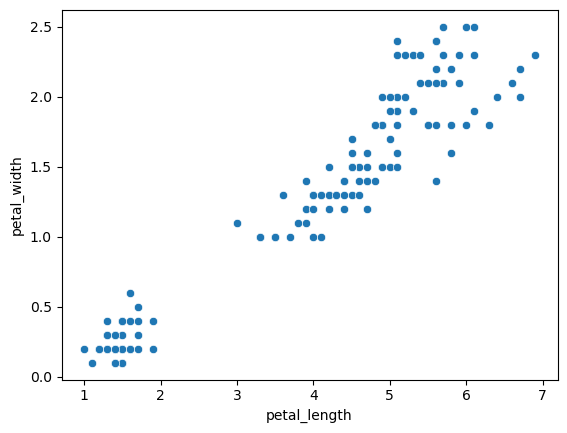

In [26]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width')

In [27]:
iris = sns.load_dataset('iris')
iris.corr(method='spearman')

C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\862090495.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr(method='spearman')


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.166778,0.881898,0.834289
sepal_width,-0.166778,1.000000,-0.309635,-0.289032
petal_length,0.881898,-0.309635,1.000000,0.937667
petal_width,0.834289,-0.289032,0.937667,1.000000


In [28]:
from scipy.stats.stats import spearmanr
spearmanr(iris.petal_length, iris.petal_width)

C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\2802857894.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import spearmanr


SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)

In [29]:
import pandas as pd

In [30]:
redwine = pd.read_csv('winequality-red.csv', delimiter=';')

In [31]:
redwine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


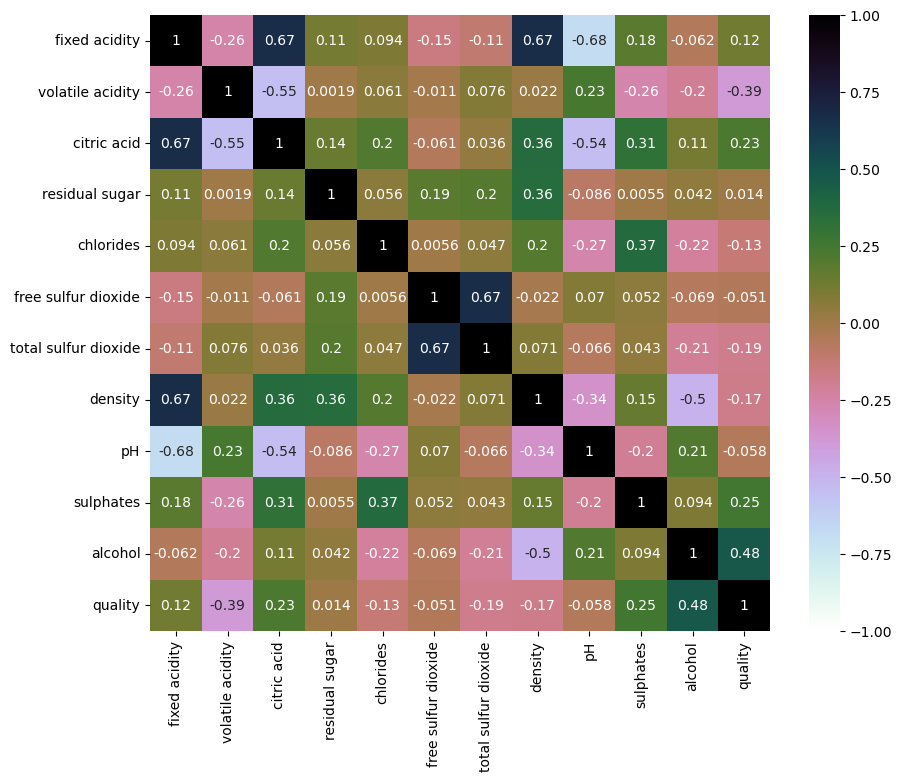

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True, cmap='cubehelix_r')
#sns.heatmap(redwine.corr(), vmin=-1, vmax=1, annot=True, annot_kws=True, cmap='cubehelix_r')
plt.show()

In [35]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [39]:
import numpy as np
A = np.c_[X, np.ones(8)]
B = np.array(Y)

In [40]:
A

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.],
       [126.,   1.],
       [144.,   1.],
       [152.,   1.],
       [158.,   1.]])

In [41]:
B

array([ 17,  24,  62,  49,  52, 105, 130, 125])

In [42]:
model = np.linalg.inv(A.T @ A) @ A.T @ B
model

array([  0.87962664, -27.35846347])

In [44]:
from scipy import stats
result = stats.linregress(X, Y)
print(f"slope: {result.slope}")
print(f"intercept: {result.intercept}")
print(f"rvalue: {result.rvalue}")
print(f"pvalue: {result.pvalue}")
print(f"stderr: {result.stderr}")
print(f"intercept_stderr: {result.intercept_stderr}")

slope: 0.8796266379465087
intercept: -27.3584634715491
rvalue: 0.89008928103186
pvalue: 0.003051790677096642
stderr: 0.18388671751663876
intercept_stderr: 21.848883987057672


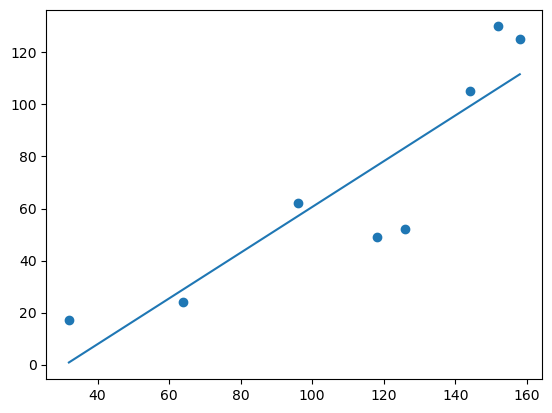

In [47]:
slope = result.slope
intercept = result.intercept
plt.scatter(X, Y)
plt.plot(X, slope*np.array(X) + intercept, '-')
plt.show()

In [48]:
fit = np.polyfit(X, Y, 1)
fit

array([  0.87962664, -27.35846347])

In [49]:
fit_fn = np.poly1d(fit)
fit_fn

poly1d([  0.87962664, -27.35846347])

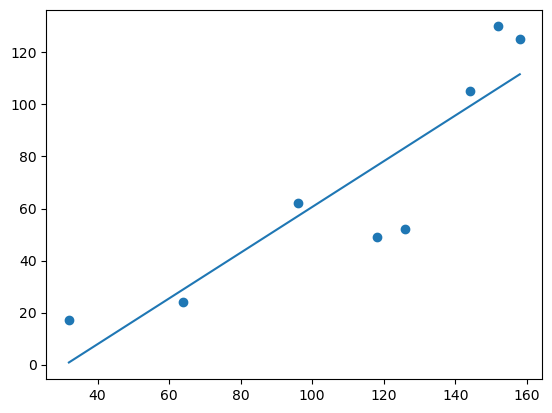

In [50]:
plt.scatter(X, Y)
plt.plot(X, fit_fn(X))
plt.show()

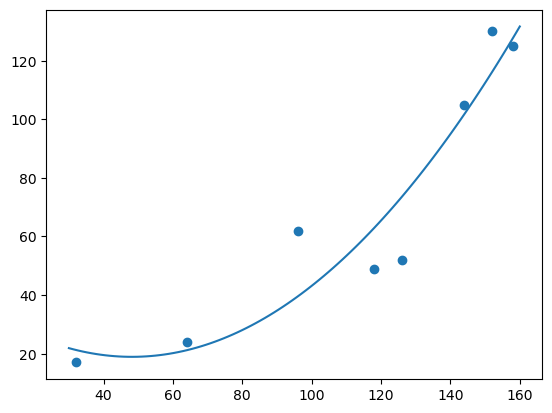

In [51]:
fit = np.polyfit(X, Y, 2)
fit_fn = np.poly1d(fit)
sample_X = np.linspace(30, 160, 100)
plt.scatter(X, Y)
plt.plot(sample_X, fit_fn(sample_X))
plt.show()

In [52]:
def draw_polyfit(X, Y, deg=1):
    import numpy as np
    fit = np.polyfit(X, Y, deg)
    print(fit)
    fit_fn = np.poly1d(fit)
    sample_X = np.linspace(min(X), max(X), 100)
    plt.scatter(X, Y)
    plt.plot(sample_X, fit_fn(sample_X))
    plt.show()

[ 1.36900759e-04 -3.06581641e-02  2.52476185e+00 -3.87896220e+01]


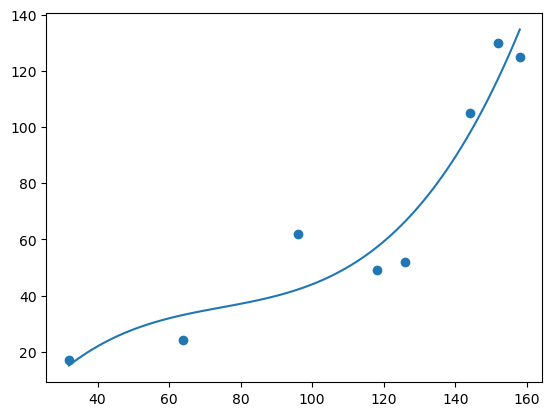

In [53]:
draw_polyfit(X, Y, 3)

[ 1.99322810e-06 -6.27067834e-04  7.07083835e-02 -2.84352700e+00
  5.30450887e+01]


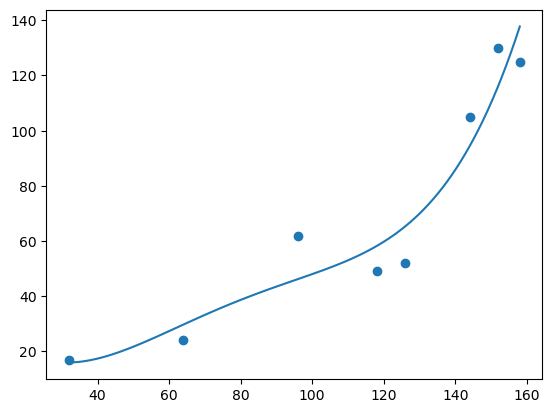

In [54]:
draw_polyfit(X, Y, 4)

[-3.60679943e-07  1.80553138e-04 -3.41559339e-02  3.01519333e+00
 -1.21436798e+02  1.75743817e+03]


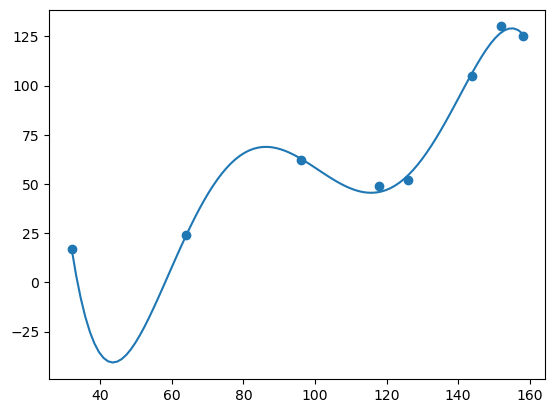

In [55]:
draw_polyfit(X, Y, 5)

[-6.18327318e-09  3.46694642e-06 -7.70219609e-04  8.62372828e-02
 -5.09766458e+00  1.50398974e+02 -1.70364025e+03]


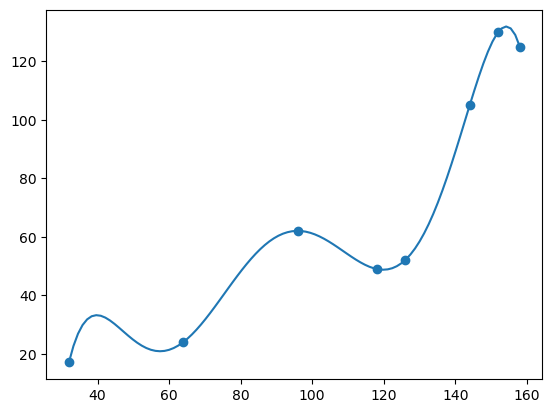

In [56]:
draw_polyfit(X, Y, 6)

[ 7.85805991e-12 -1.21087509e-08  5.33126998e-06 -1.08597267e-03
  1.17130964e-01 -6.82859028e+00  2.01173934e+02 -2.29366805e+03]


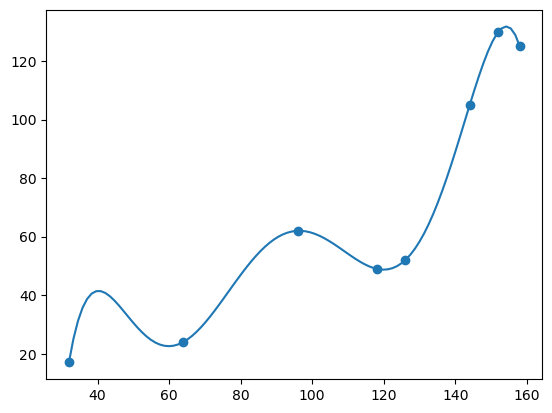

In [58]:
draw_polyfit(X, Y, 7)

[ 8.45527810e-14 -6.73939151e-11  1.66036825e-08 -7.84003144e-07
 -2.93980664e-04  5.36060130e-02 -3.76982568e+00  1.21206530e+02
 -1.43890685e+03]


C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\3715535473.py:3: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(X, Y, deg)


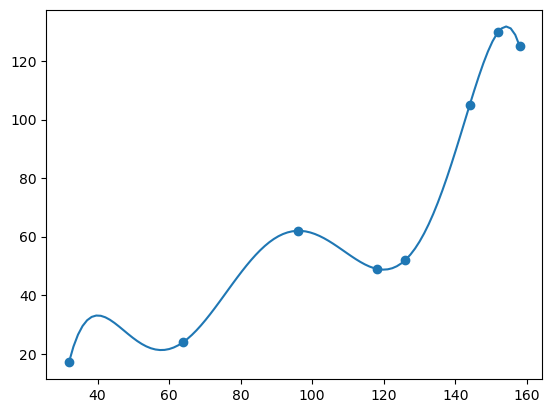

In [59]:
draw_polyfit(X, Y, 8)

[ 4.75125310e-16 -2.75503211e-13  3.80522124e-11  3.56778570e-09
 -8.75987675e-07 -6.26557040e-05  2.36079223e-02 -1.94714398e+00
  6.66101378e+01 -8.03992976e+02]


C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\3715535473.py:3: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(X, Y, deg)


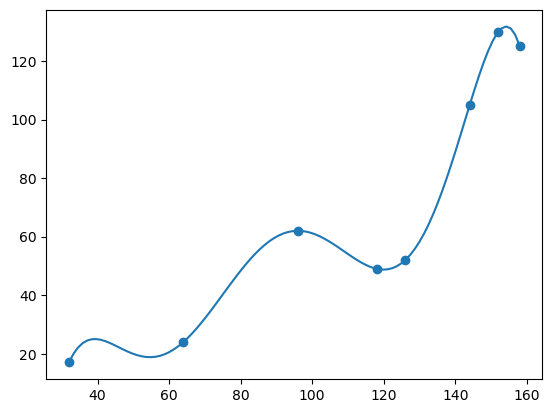

In [60]:
draw_polyfit(X, Y, 9)

[-0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000 -4.34457612e-152 -6.33260069e-150
 -9.14909122e-148 -1.30785364e-145 -1.84536414e-143 -2.56149381e-141
 -3.48079148e-139 -4.59598591e-137 -5.82337775e-135 -6.91804794e-133
 -7.31817884e-131 -5.86651063e-129 -3.22033440e-128  1.34816723e-124
  4.30659910e-122  1.01703428e-119  2.12384499e-117  4.14306657e-115
  7.73361759e-113  1.39887592e-110  2.46997460e-108  4.27649692e-106
  7.28141833e-104  1.22141792e-101  2.02067488e-099  3.29855483e-097
  5.31299019e-095  8.43960118e-093

C:\Users\KOSA\anaconda3\Lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\3715535473.py:3: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(X, Y, deg)


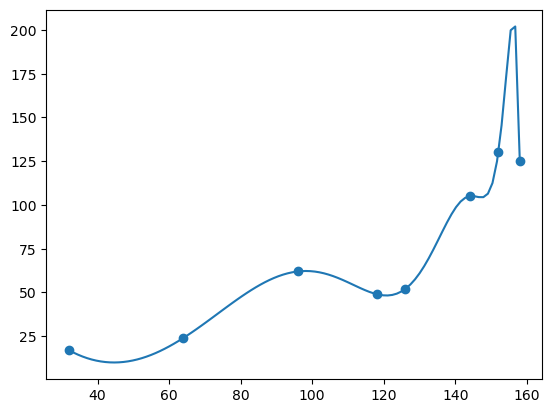

In [61]:
draw_polyfit(X, Y, 100)

[-0.00000000e+000 -0.00000000e+000  0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000

C:\Users\KOSA\AppData\Local\Temp\ipykernel_1496\3715535473.py:3: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(X, Y, deg)


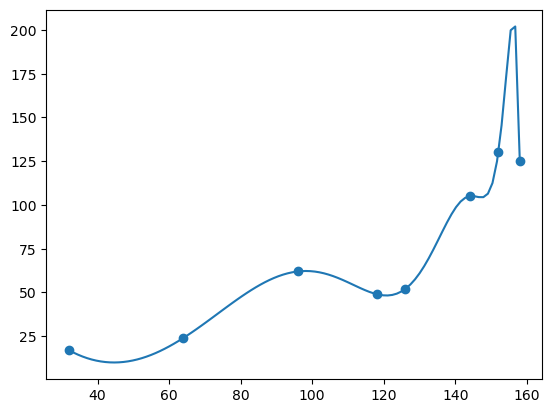

In [75]:
draw_polyfit(X, Y, 140)

In [76]:
from statsmodels.formula.api import ols

In [80]:
X = [32, 64, 96, 118, 126, 144, 152, 158]
Y = [17, 24, 62, 49, 52, 105, 130, 125]

In [82]:
df = pd.DataFrame(np.c_[X, Y], columns=["x", "y"])

In [83]:
ols("Y ~ X", data=df)

In [86]:
import statsmodels.api as sm

In [87]:
model = sm.OLS.from_formula("Y ~ X", data=df)

In [88]:
sm.OLS.from_formula("Y ~ X + Z", data=df)

PatsyError: Error evaluating factor: NameError: name 'Z' is not defined
    Y ~ X + Z
            ^

In [93]:
from statsmodels.formula.api import ols
model = ols("y ~ x", data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

In [99]:
model = sm.OLS.from_formula("y ~ x", data=df)
result = model.fit()
result.params

Intercept   -27.358463
x             0.879627
dtype: float64

medel2 = ols("y ~ x + I(x**2) + I(x**3) -1", data=df)
result2 = model2.fit()
result2.params

In [101]:
model2 = ols("y ~ x + I(x**2) + I(x**3) -1 ", data=df)
result2 = model2.fit()
result2.params

x            1.005637
I(x ** 2)   -0.013981
I(x ** 3)    0.000082
dtype: float64

In [102]:
y_ = result2.predict(df.x)

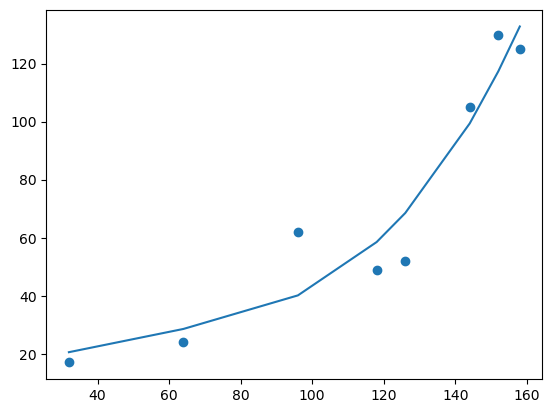

In [103]:
plt.scatter(X, Y)
plt.plot(X, y_)
plt.show()